# Bank Marketing Campaign Analysis

The project aims to build robust models for predicting a binary outcome (likely subscription), ensure fair treatment of the minority class (subscribers), and evaluate how different techniques (like SMOTE) affect model performance. The ultimate goal is to create a model that is accurate, reliable, and sensitive to the underrepresented class.

#### Dataset

The dataset is available in the Bank Marketing Dataset.zip file, which includes:

- bank-full.csv: The primary dataset with all records.
- bank.csv: A smaller subset of the data for quick testing.
- bank-names.txt: Feature descriptions and metadata.

**Features**

- Demographics: age, job, marital, education
- Financial Information: balance, loan, housing, default
- Campaign Data: duration, campaign, pdays, previous
- Outcome: y (Target variable: 1 for subscription, 0 otherwise)

### 1. Import Libraries

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

### 2. Load Data

In [2]:
# Define file paths
zip_file_path = 'Bank Marketing Dataset.zip'  
extracted_folder = 'Bank_Marketing_Data' 

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load the dataset
csv_file_name = os.path.join(extracted_folder, 'bank-full.csv')
df = pd.read_csv(csv_file_name)

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Key Findings

- **Age**: Customers' ages range from 18 to 95, with a concentration around the 40-year mark.
- **Account Balance**: The balance range is wide, with some customers in debt, but most have relatively low balances.
- **Campaign and Contact Information**: The campaign involved multiple contacts, but most customers were contacted 1 to 3 times.
- **Target Variable (y)**: Only a small percentage (12%) of customers subscribed to the term deposit. This suggests that the campaign may not have been highly successful or that subscription was selective.

### 3. Clean Data

In [5]:
# Convert target variable to binary format
# The y column (target variable) is converted from categorical values ('yes'/'no') to numeric (1/0).
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Drop 'duration' as it is not a practical predictive feature
# The duration column is dropped as it's not useful for predictive modeling.
df = df.drop(columns=['duration'])

# Handle categorical variables
# The duration column is dropped as it's not useful for predictive modeling.
X = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
y = df['y']

### 8. Exploratory Data Analysis (EDA)

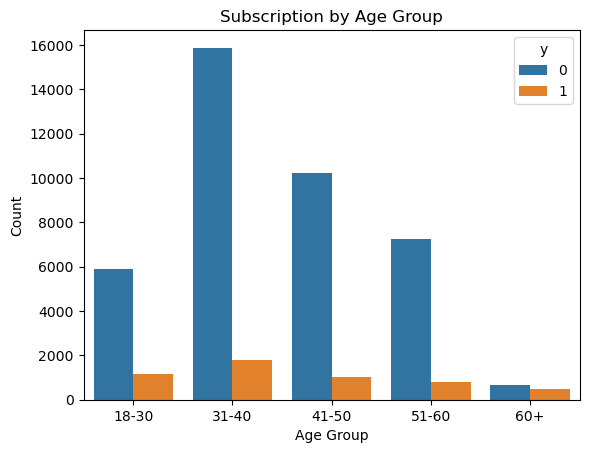

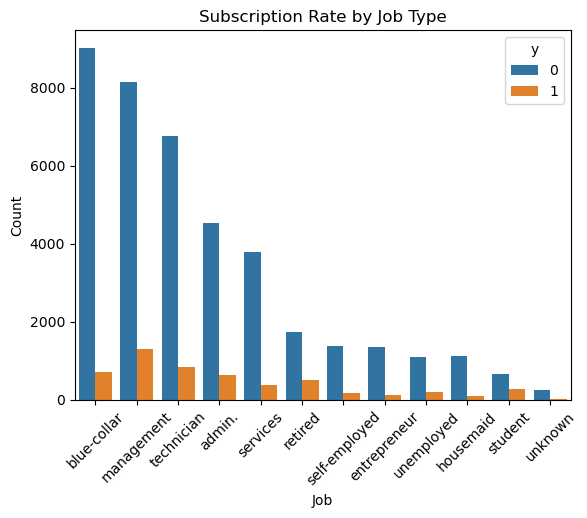

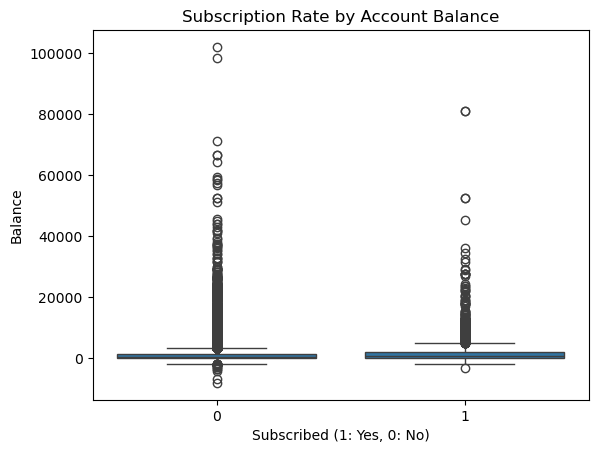

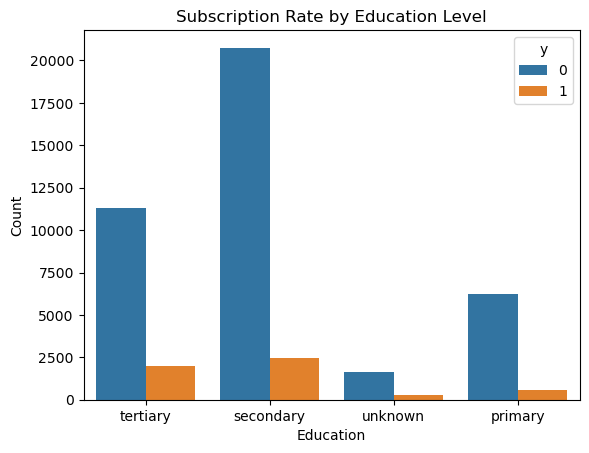

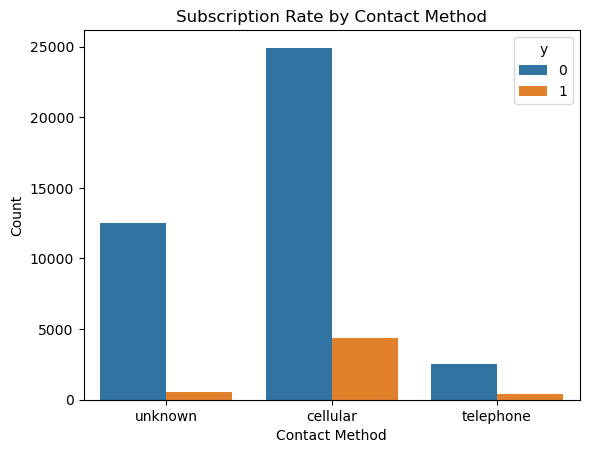

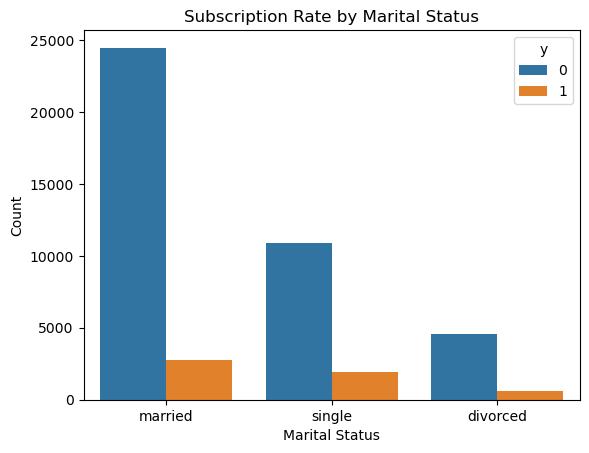

In [6]:
# Distribution of subscription by age group
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
sns.countplot(x='age_group', hue='y', data=df)
plt.title('Subscription by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Subscription rate by job type
sns.countplot(x='job', hue='y', data=df, order=df['job'].value_counts().index)
plt.title('Subscription Rate by Job Type')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Subscription rate by balance
sns.boxplot(x='y', y='balance', data=df)
plt.title('Subscription Rate by Account Balance')
plt.xlabel('Subscribed (1: Yes, 0: No)')
plt.ylabel('Balance')
plt.show()

# Subscription rate by education level
sns.countplot(x='education', hue='y', data=df)
plt.title('Subscription Rate by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Subscription rate by contact method
sns.countplot(x='contact', hue='y', data=df)
plt.title('Subscription Rate by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

# Subscription rate by marital status
sns.countplot(x='marital', hue='y', data=df)
plt.title('Subscription Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

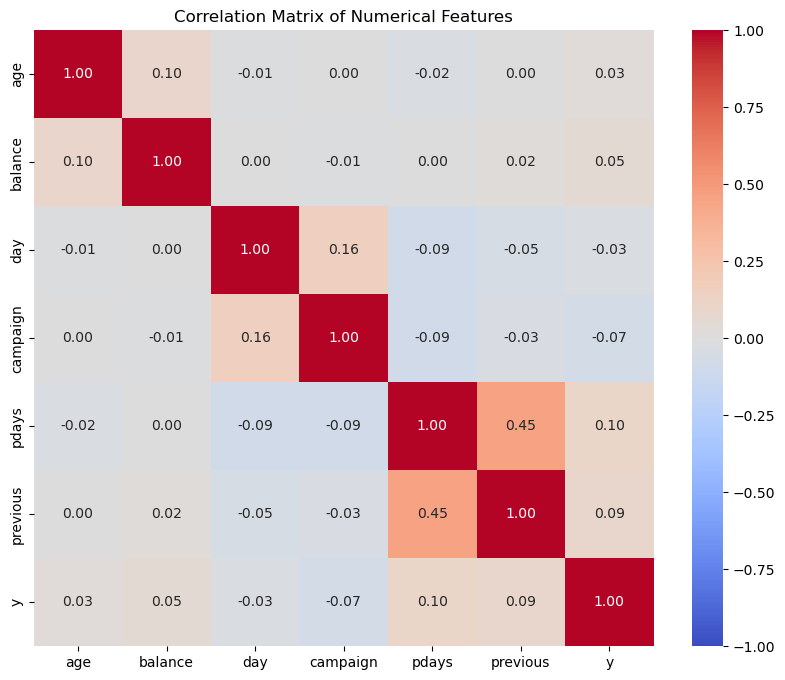

Correlation of Numerical Features with Target Variable (y):
y           1.000000
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


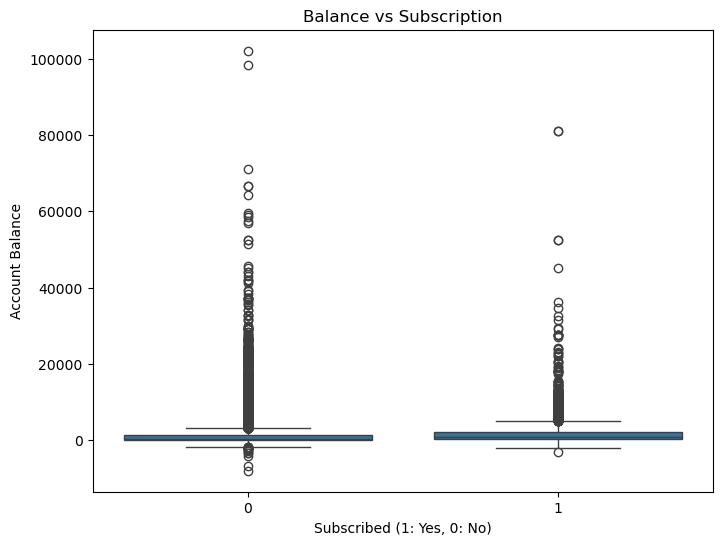

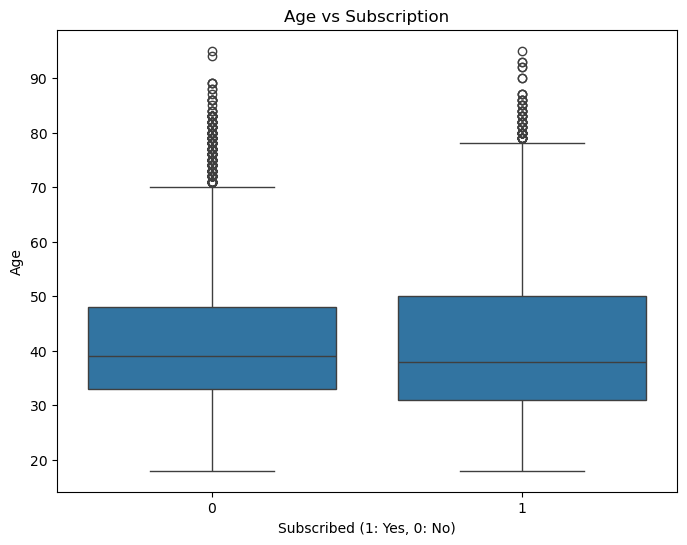

In [7]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation of numerical features with the target variable 'y'
cor_target = correlation_matrix['y'].sort_values(ascending=False)
print("Correlation of Numerical Features with Target Variable (y):")
print(cor_target)

# Visualizing correlation between 'balance' and 'y'
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance vs Subscription')
plt.xlabel('Subscribed (1: Yes, 0: No)')
plt.ylabel('Account Balance')
plt.show()

# Visualizing correlation between 'age' and 'y'
plt.figure(figsize=(8, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age vs Subscription')
plt.xlabel('Subscribed (1: Yes, 0: No)')
plt.ylabel('Age')
plt.show()

### 7. Feature Importance

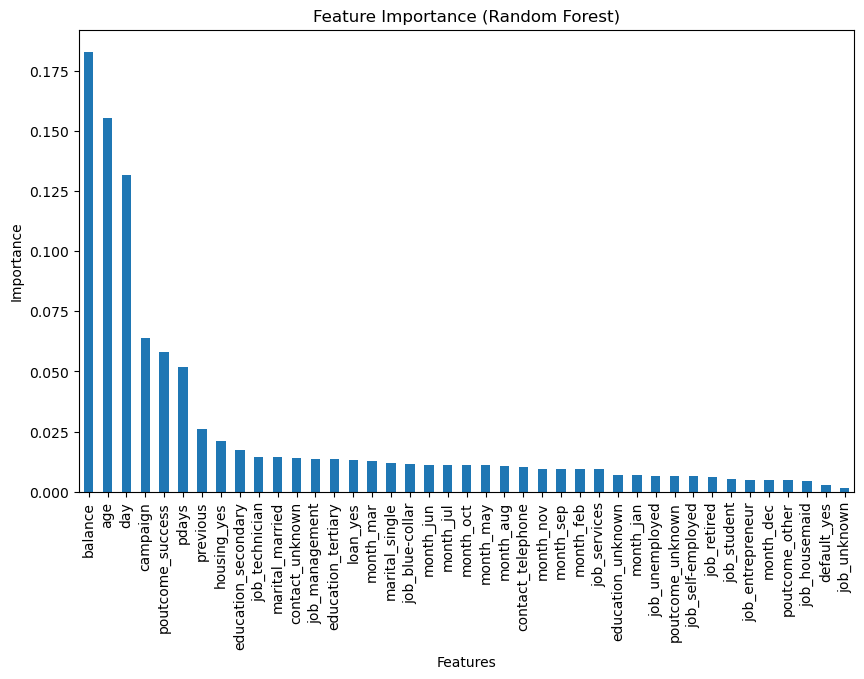

In [8]:
# Split data into training and test sets before model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building - Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance for Random Forest
def plot_feature_importance(model, X):
    importances = model.feature_importances_
    features = X.columns
    feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
    feature_importance.plot(kind='bar', figsize=(10, 6))
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(rf_model, X)

In [9]:
# Model Building - XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### 6. Evaluate Models

C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\milto\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random Forest Model Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7952
           1       0.48      0.32      0.38      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.63      0.66      9043
weighted avg       0.86      0.88      0.86      9043

ROC-AUC Score: 0.6348


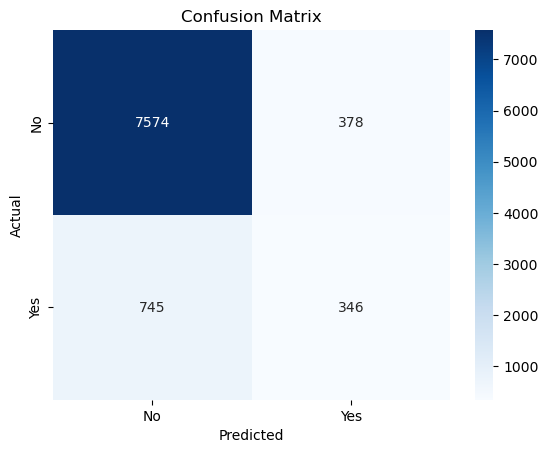

XGBoost Model Performance (with SMOTE):
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7952
           1       0.47      0.34      0.40      1091

    accuracy                           0.87      9043
   macro avg       0.69      0.65      0.66      9043
weighted avg       0.86      0.87      0.87      9043

ROC-AUC Score: 0.6455


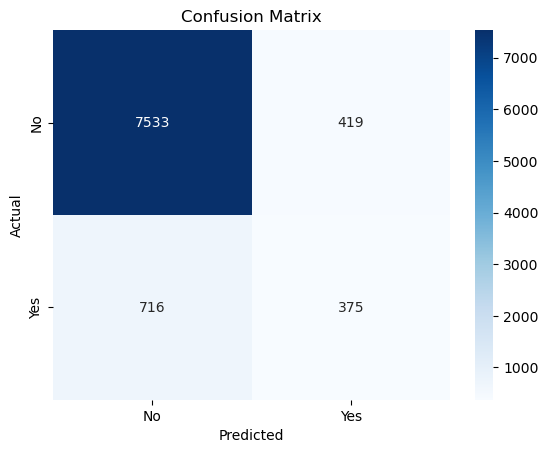

In [13]:
# Import necessary libraries for SMOTE and balancing
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline

# Define a function to evaluate models after balancing data
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Split the data (with no SMOTE applied yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create a Random Forest model pipeline with SMOTE
rf_model = imPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model on SMOTE-balanced training data
rf_model.fit(X_train_smote, y_train_smote)

# Create an XGBoost model pipeline with SMOTE
xgb_model = imPipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
])

# Fit the model on SMOTE-balanced training data
xgb_model.fit(X_train_smote, y_train_smote)

# Evaluate Random Forest Model
print("Random Forest Model Performance (with SMOTE):")
evaluate_model(rf_model, X_test, y_test)

# Evaluate XGBoost Model
print("XGBoost Model Performance (with SMOTE):")
evaluate_model(xgb_model, X_test, y_test)

### Interpretation

- SMOTE improved recall for Class 1 (subscribers), but there is still significant imbalance in how well the models predict the minority class (subscribers).
- The precision and recall for subscribers (Class 1) are still quite low, suggesting that while SMOTE helped, additional techniques like undersampling, cost-sensitive learning, or hyperparameter tuning could be beneficial.
- Accuracy and performance on Class 0 are strong, but the real concern is improving the performance for Class 1, which is essential for any model predicting a minority class (such as in subscription prediction).
- The ROC-AUC score shows that there is still room for improvement in the models' ability to differentiate between classes.

## Conclusion

This project aimed to build robust machine learning models for predicting customer subscriptions to a term deposit, with a primary focus on addressing the significant class imbalance between subscribers and non-subscribers. The analysis revealed key insights about the dataset, such as the concentration of customers' ages around 40 years, a wide range of account balances, and the fact that a small percentage (12%) of customers subscribed to the term deposit. This low subscription rate suggests that the campaign was either not widely successful or that subscriptions were selective.

After applying SMOTE to balance the dataset, the models showed improvements in recall for the minority class (subscribers). However, while SMOTE addressed some of the imbalance, there is still significant room for improvement in the models' ability to predict subscribers. Precision and recall for Class 1 (subscribers) remain low, indicating that additional techniques—such as undersampling, cost-sensitive learning, or hyperparameter tuning—could further improve performance.

Although accuracy for predicting non-subscribers (Class 0) remains strong, the primary concern lies in enhancing the performance for the minority class, which is crucial in scenarios like subscription prediction. The ROC-AUC score suggests that the models' ability to distinguish between subscribers and non-subscribers can still be optimized.

In conclusion, while the models are able to make accurate predictions for the majority class, further efforts to improve recall for subscribers are necessary. This would involve fine-tuning the models, implementing more advanced balancing techniques, and optimizing hyperparameters. The project has demonstrated the importance of handling class imbalance and the potential of techniques like SMOTE, but there is still significant potential for improving the models' overall performance in predicting the minority class.

### Additional Possible Goals (Based on Output):
- Model Optimization: The project also hints at further optimization through hyperparameter tuning or advanced techniques (e.g., probability calibration or ensemble methods) to improve performance.
- Class Imbalance Management: The goal is to handle class imbalance effectively, which is often a key challenge in real-world classification problems, particularly when dealing with rare events (e.g., subscription sign-ups).